In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/economic_index.csv')
data.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df = data.drop(columns=['year','month','Unnamed: 0'])
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [4]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [5]:
df.corr()  ## interest_rate	ile unemployment_rate ters, index_price doğru orantılı
## index_price	unemployment_rate ile ters orantılı

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

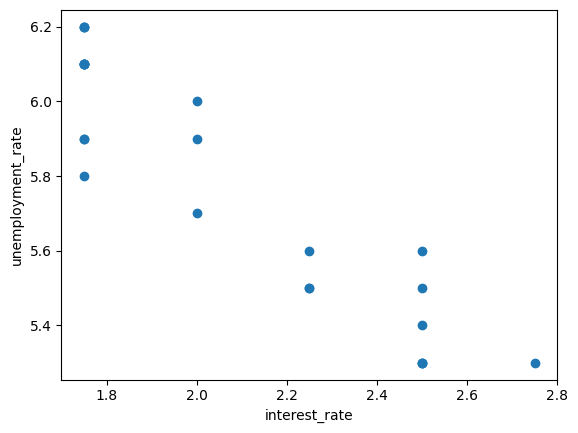

In [6]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

Text(0, 0.5, 'index_price')

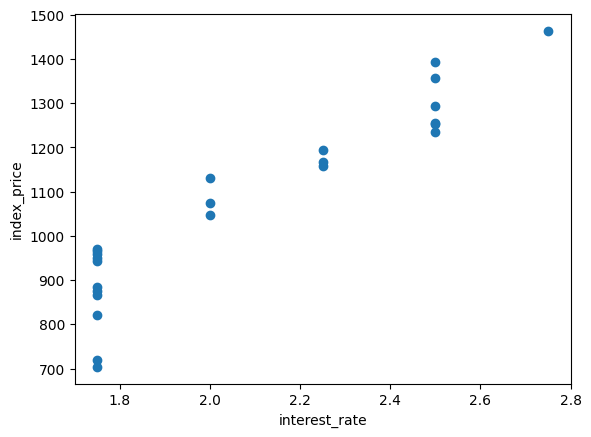

In [7]:
plt.scatter(df['interest_rate'],df['index_price'])
plt.xlabel('interest_rate')
plt.ylabel('index_price')

Text(0, 0.5, 'unemployment_rate')

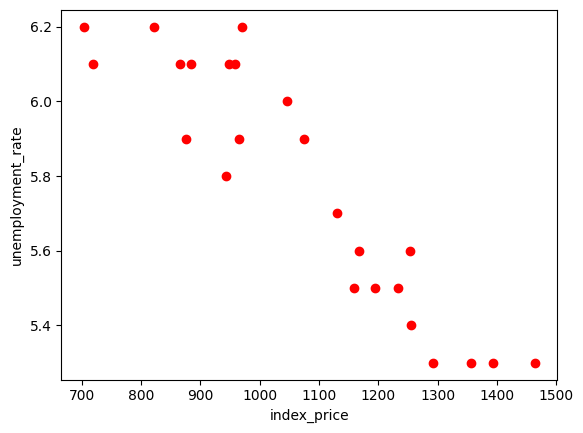

In [8]:
plt.scatter(df['index_price'],df['unemployment_rate'],color='r')
plt.xlabel('index_price')
plt.ylabel('unemployment_rate')

In [9]:
## independent and dependent features

##X = df[['interest_rate','unemployment_rate']]
X = df.iloc[:,:-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [10]:
y = df.iloc[:,-1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

🔹 Cross Validation (örn. cross_val_score) tam olarak ne yapıyor?

Diyelim ki elimizde X_train, y_train var.
Örneğin: 750 tane veri.

cv=5 dediğimizde:

Bu 750 veriyi 5 eşit parçaya böler (150’şer).

Sonra şu döngü başlar:

1. iterasyon:

parça → validation (150)

diğer 4 parça (600) → train

Model bu 600 ile eğitilir, 150 üzerinde test edilir → skor 1

2. iterasyon:

2. parça → validation

diğer 4 parça → train

Model eğitilir, test edilir → skor 2

… böyle devam eder, toplam 5 skor elde edilir.

En sonunda bu skorların ortalaması alınır → işte cross validation sonucu.

🔹 Neden yapıyoruz?

Eğer sadece train_test_split yaparsan → 1 tane sonuç alırsın. Ama o sonuç şansa bağlı olabilir (hangi veriler test setine denk geldiyse).

Cross validation → aynı veri üzerinde modeli farklı parçalarda dener. Bu sayede modelin daha genellenebilir olup olmadığını anlarız.

🔹 Basit benzetme

train_test_split → Tek bir sınava girmek gibi.

cross_val_score → 5 farklı sınava girip ortalamasını almak gibi. Daha güvenilir, şansa bırakmaz.

👉 Yani senin dediğin gibi:
Evet, cross validation training verisini bölüyor ve kendi içinde “kontrol” yapıyor.
Amaç, modelin “farklı durumlarda” da iyi çalışıp çalışmadığını ölçmek.

In [11]:
## train , test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

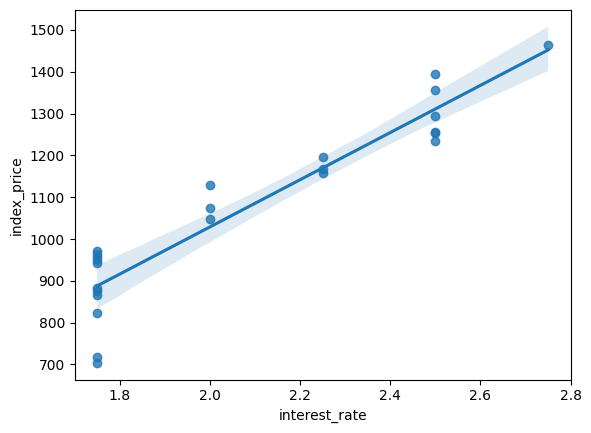

In [13]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

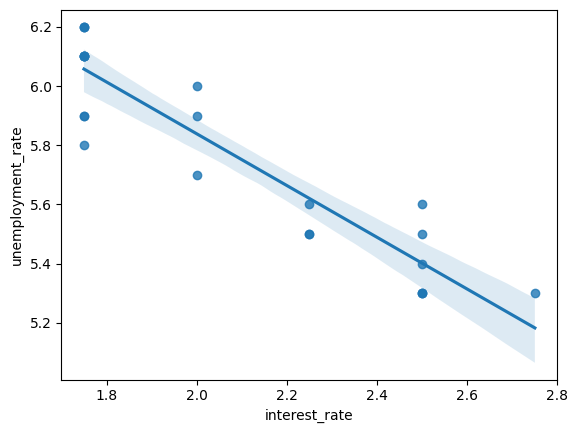

In [14]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

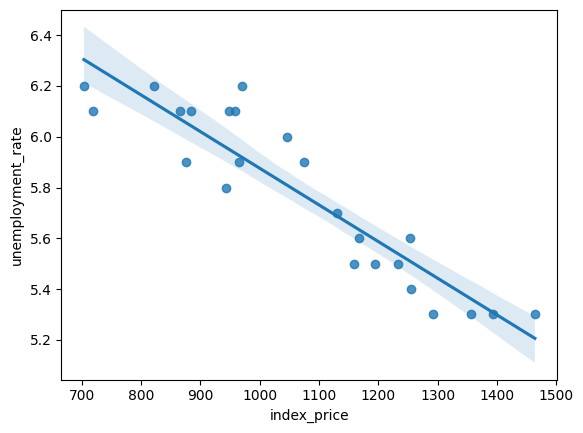

In [15]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regression = LinearRegression() 
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [21]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [22]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [23]:
df['index_price'].min()

np.int64(704)

In [24]:
df['index_price'].max()

np.int64(1464)

In [25]:
## prediction
y_pred = regression.predict(X_test)

In [26]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [27]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mse = mean_squared_error(y_test,y_pred) 
mae = mean_absolute_error(y_test,y_pred) 
rmse = np.sqrt(mse) #
print(mse) 
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [29]:
from sklearn.metrics import r2_score

In [30]:
score = r2_score(y_test,y_pred)
print(score) 

0.7591371539010257


In [31]:
1-(1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1] -1) 

0.5985619231683761

#### Assumptions

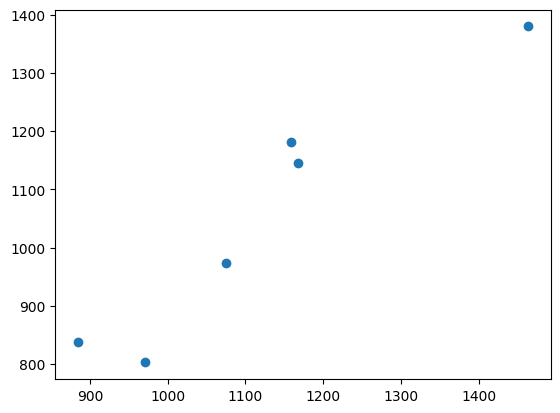

In [32]:
plt.scatter(y_test,y_pred)

In [33]:
residuals = y_test - y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

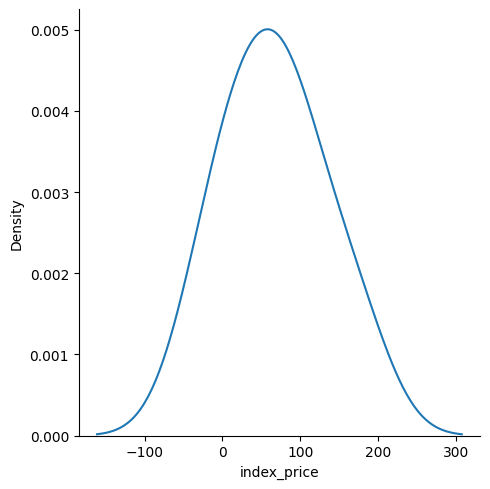

In [34]:
## Plot this residuals
sns.displot(residuals,kind='kde')

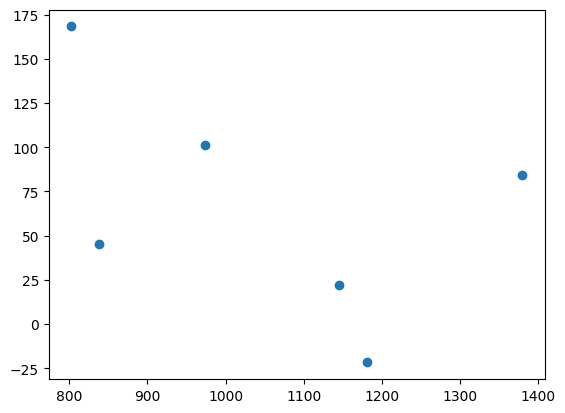

In [40]:
## scatter plot with respect to prediction and residuals
plt.scatter(x=y_pred,y=residuals)

#### OLS

In [36]:
import statsmodels.api as sm

In [37]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 04 Oct 2025   Prob (F-statistic):                       0.754
Time:                        16:52:32   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""